# Στοιχεία Ομάδας

**Αριθμός Ομάδας:** 66

**Ονοματεπώνυμα και ΑΜ:**

Τσιλιβής Θεόδωρος 03116032

Στόικου Θεοδότη 03117085

Ποταμίτου Νεφέλη 03117709

Dependencies:


In [2]:
!pip install --upgrade pip  &> /dev/null#upgrade pip package installer 
!pip install scikit-learn --upgrade  &> /dev/null#upgrade scikit-learn package
!pip install numpy --upgrade  &> /dev/null#upgrade numpy package
!pip install pandas --upgrade  &> /dev/null#--upgrade #upgrade pandas package
!pip install texttable &> /dev/null

Imports:

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
from texttable import Texttable
import seaborn as sns
import time

# Μικρό dataset (Echocardiogram)


## Βασικές πληροφορίες

### 1. Σύντομη παρουσίαση του dataset:


Το συγκεκριμένο dataset ονομάζεται Echocardiogram και παρουσιάζει στοιχεία για την ταξινόμηση της πιθανότητας επιβίωσης ενός ασθενή, για τουλάχιστον ένα έτος, μετά από καρδιακή προσβολή.

In [32]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"


--2020-12-09 16:37:33--  http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6107 (6.0K) [application/x-httpd-php]
Saving to: ‘echocardiogram.data.1’

echocardiogram.data 100%[===================>]   5.96K  --.-KB/s    in 0s      

2020-12-09 16:37:33 (465 MB/s) - ‘echocardiogram.data.1’ saved [6107/6107]



### 2. Δειγμάτα και Χαρακτηριστικά



Τα δείγματα είναι 132 και τα χαρακτηριστικά είναι 13, όμως το 10 και το 12 μπορούν να αγνοηθούν, ενώ το 9 συνίσταται να αντικαταστήσει το 8. Όλα τα χαρακτηριστικά είναι διατεταγμένα, εκτός από το 12 (name).

### 3. Επικεφαλίδες

Δεν υπάρχουν επικεφαλίδες και η αρίθμηση γραμμών γίνεται από τη βιβλιοθήκη pandas. 
(Στην γραμμη 50 του echocardiogram.data, διαγράψτε το 1ο κομμα "," (typo), πριν τρέξετε το επόμενο cell)

In [33]:
all_data = pd.read_csv("echocardiogram.data",delimiter = ',',header = None)
# all_data.drop([10, 11], axis=1)
data = all_data.values
data = np.delete(data, 10, 1)
data = np.delete(data, 10, 1)
data = np.delete(data, 9, 1)
data = np.delete(data, 1, 1)
data = np.delete(data, 1, 1)
print(data)
print(data.shape)

[['11' 0 '0.260' ... '14' '1' '0']
 ['19' 0 '0.380' ... '14' '1.700' '0']
 ['16' 0 '0.260' ... '14' '1' '0']
 ...
 ['36' 0 '0.20' ... '14.5' '1.21' '?']
 ['22' 0 '0.14' ... '15' '1.36' '?']
 ['20' 0 '0.15' ... '15.5' '1.409' '?']]
(131, 8)


Το χαρακτηριστικό εξοδου (η κλάση) είναι το 13ο “alive-at-1”. Θα κρατήσετε μόνο όσα δείγματα δεν έχουν “?” στο “alive-at-1”. Τα χαρακτηριστικά είναι τα 3 έως 9 (τα υπόλοιπα μπορούν να αγνοηθούν). Η πρόβλεψη μπορεί να γίνει και με τα χαρακτηριστικά 1-9 (όπως διατυπώθηκε αρχικά) απλά θα δίνει πολύ υψηλές τιμές (που δεν προσφέρονται για πολύ περεταίρω βελτιστοποίηση) γιατί υπάρχει μεγάλη συσχέτιση (αν και όχι απόλυτη) μεταξύ των χαρακτηριστικών 1 και 2 και της μεταβλητής εξόδου. Δείτε εδώ τη συσχέτιση Pearson μεταξύ χαρακτηριστικών και εξόδου. Οι κολόνες 1-9 είναι τα χαρακτηριστικά εισόδου (έχουμε αφαιρέσει τα 3 άχρηστα αρχικά χαρακτηριστικά) και η 10η κολόνα είναι η έξοδος. Τιμές κοντά στο -1 ή στο 1 δείχνουν υψηλή συσχέτιση, αντίστροφη (-1) ή ανάλογη (1). Δείτε εδώ μια βιβλιογραφική αναφορά για τη διαχείριση του dataset.


### 4. Ετικέτες κλάσεων 

 Οι ετικέτες των κλάσεων βρίσκονται στο τελευταίο column (12) του dataframe. Το attribute alive-at-1 είναι boolean και δηλώνει αν ο ασθενής έχει ή όχι επιζήσει 1 χρόνο μετά την καρδιακή προσβολή (εκτός της περίπτωσης missing values, η οποία συμβολίζεται με "?").

In [34]:
for i in range(data.shape[0]):
    print(data[i][7])

0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
1
1
1
1
1
?
?
?
?
?
0
?
?
?
?
0
0
0
1
0
?
0
0
0
0
?
?
0
0
1
1
1
?
0
1
0
0
0
0
?
0
?
0
?
?
0
?
0
0
0
1
0
0
0
?
0
?
1
0
?
?
0
?
1
1
?
?
?
0
?
?
?
0
?
1
?
0
?
1
1
?
0
0
?
1
0
0
?
1
1
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


### 5. Μετατροπές στα αρχεία




Το αρχείο μας δίνεται κατευθείαν σε .data format και το φορτώνουμε απευθείας σε pandas dataframe.

### 6. Απουσιάζουσες τιμές και δείγματα


 Υπάρχουν απουσιάζουσες τιμές. Συνολικά οι απουσιάζουσες τιμές είναι 132 και παρακάτω υπολογίζουμε τα δείγματα με απουσιάζουσες τιμές και το ποσοστό τυος επί του συνολικού πλήθους δειγμάτων.

In [35]:
missing =0;
for i in range (data.shape[0]):
  for j in range (data.shape[1]):
    if data[i][j] == "?":
      missing = missing +1;
      break
print("Δείγματα με απουσιάζουσες τιμές:", missing)
print("Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές:", missing/data.shape[0]*100 , "%")


Δείγματα με απουσιάζουσες τιμές: 69
Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές: 52.67175572519084 %


In [36]:
print("Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές:", missing/data.shape[0]*100 , "%")

Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές: 52.67175572519084 %


### 7. Αριθμός κλάσεων, ποσοστά δειγμάτων και ισορροπία του dataset.



 Οι κλάσεις είναι 2 (binary) και δηλώνουν αν ο ασθενής επέζησε ή όχι στον επόμενο χρόνο. Παρακάτω υπολογίζεται το πλήθος των δειγμάτων της κάθε κλάσης και το ποσοστό των δειγμάτων της επί του συνολικού πλήθους των δειγμάτων. Δεν συνυπολογίσαμε τα missing values. Το πλήθος των δειγμάτων που έχουν missing values στην κλάση είναι 132 - 58 = 74. Άρα στην κλάση 0 ανήκει το 68% και στην κλαση 1 το 32%. Άρα το dataset μπορεί να χαρακτηριστεί (οριακά) μη ισορροπημένο.

In [37]:
zeros=0
ones=0
for i in range (data.shape[0]):
  if (data[i][7] == "0"):
    zeros = zeros +1
  elif (data[i][7] =="1"):
    ones = ones +1
print("Πλήθος δειγμάτων της κλασης 0:", zeros)
print("Ποσοστό δειγμάτων της κλάσης 0 επί του συνόλου των δειγμάτων:", zeros/data.shape[0]*100, "%")
print("Πλήθος δειγμάτων της κλασης 1:", ones)
print("Ποσοστό δειγμάτων της κλάσης 1 επί του συνόλου των δειγμάτων:", ones/data.shape[0]*100, "%")

Πλήθος δειγμάτων της κλασης 0: 50
Ποσοστό δειγμάτων της κλάσης 0 επί του συνόλου των δειγμάτων: 38.16793893129771 %
Πλήθος δειγμάτων της κλασης 1: 24
Ποσοστό δειγμάτων της κλάσης 1 επί του συνόλου των δειγμάτων: 18.3206106870229 %


### 8. Διαχωρισμός train και test set.


Σε αυτό το σημείο κάνουμε και την προεπεξεργασία. Αρχικώς αφαιρούμε από τα δεδομένα όλα τα δείγματα που έχουν ως ετικέτα "?". Στην συνέχεια στα εναπομέινοντα δείγματα τοποθετούμε στην θέση των "?" την median τιμή της κάθε στήλης. Ο λόγος που επιλέγουμε την median και όχι την average είναι για να διαφυλάξουμε binary τιμές στα binary columns.

In [38]:
data = data[np.logical_not(data[:,7] == '?')]
data = np.where(data=="?", np.NaN, data)
# print(data[60:]) 
imp_mean = SimpleImputer(missing_values= np.NaN, strategy='median')
imp_mean.fit(data)
data = imp_mean.transform(data)
features_all = preprocessing.scale(data)[:,:7]
labels_all = data[:,7]
X_train, X_test, y_train, y_test = train_test_split(features_all, labels_all, test_size=0.2, random_state=2)

## Baseline Ταξινόμηση

### Help Code

In [40]:
def Baseline_approach(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(str(classifier),classifier.score(X_test,y_test))
    print("f1 micro score =",f1_score(y_test, y_pred, average='micro'))
    print("f1 macro score =",f1_score(y_test, y_pred, average='macro'))
    cf_matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(cf_matrix, annot=False, cmap='nipy_spectral')
    return classifier

def plot(clfs,score1,score,function,approach):
    plt.bar(clfs,score1)
    plt.title(approach + " " + score + " with " + function + " average")
    plt.savefig(approach + "_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def averaged_plots(classifierlist,X_test,y_test,approach):
    clfs  = ['Uni', 'Strat',"Freq","Prior","Con 0","Con 1", 'GNB', 'KNN']
    # [uniform,stratified,most_frequent,prior,consant_0,constant_1,GNB,Knn]
    score_micro = []
    score_macro = []
    recall_micro = []
    recall_macro = []
    precision_micro = []
    precision_macro = []
    for classifier in classifierlist:        
        y_pred = classifier.predict(X_test)
        score_micro.append(f1_score(y_test, y_pred, average = 'micro'))
        score_macro.append(f1_score(y_test, y_pred, average = 'macro'))        
        recall_micro.append(recall_score(y_test, y_pred, average = "micro"))
        recall_macro.append(recall_score(y_test, y_pred, average = "macro"))        
        precision_micro.append(precision_score(y_test, y_pred, average = 'micro'))
        precision_macro.append(precision_score(y_test, y_pred, average = 'macro'))
       

    plot(clfs,score_micro,"score","micro",approach)
    plot(clfs,score_macro,"score","macro",approach)
    plot(clfs,recall_micro,"recall","micro",approach)
    plot(clfs,recall_macro,"recall","macro",approach)
    plot(clfs,precision_micro,"precision","micro",approach)
    plot(clfs,precision_macro,"precision","macro",approach)

### 1. Classifiers

#### Dummy Classifiers

DummyClassifier(constant=None, random_state=None, strategy='uniform') 0.6666666666666666
f1 micro score = 0.5333333333333333
f1 macro score = 0.49760765550239233


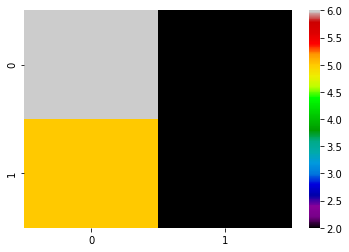

In [42]:
dc_uniform = DummyClassifier(strategy="uniform")
uniform = Baseline_approach(dc_uniform,X_train,X_test,y_train,y_test)

DummyClassifier(constant=None, random_state=None, strategy='stratified') 0.6666666666666666
f1 micro score = 0.5333333333333333
f1 macro score = 0.4444444444444444


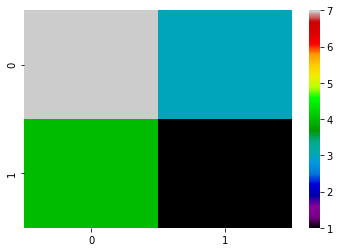

In [43]:
dc_stratified = DummyClassifier(strategy="stratified")
stratified = Baseline_approach(dc_stratified,X_train,X_test,y_train,y_test)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent') 0.7333333333333333
f1 micro score = 0.7333333333333333
f1 macro score = 0.423076923076923


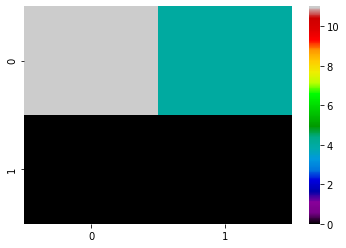

In [44]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
most_frequent = Baseline_approach(dc_most_frequent,X_train,X_test,y_train,y_test)

DummyClassifier(constant=None, random_state=None, strategy='prior') 0.7333333333333333
f1 micro score = 0.7333333333333333
f1 macro score = 0.423076923076923


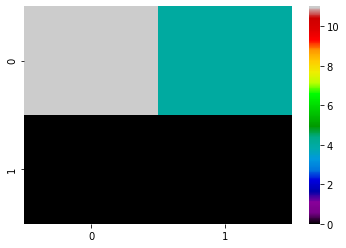

In [45]:
dc_prior = DummyClassifier(strategy="prior")
prior = Baseline_approach(dc_prior,X_train,X_test,y_train,y_test)

DummyClassifier(constant=0.0, random_state=None, strategy='constant') 0.7333333333333333
f1 micro score = 0.7333333333333333
f1 macro score = 0.423076923076923


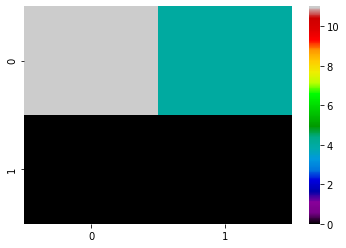

In [46]:
dc_constant_0 = DummyClassifier(strategy="constant", constant = 0.0)
constant_0 = Baseline_approach(dc_constant_0,X_train,X_test,y_train,y_test)

DummyClassifier(constant=1.0, random_state=None, strategy='constant') 0.26666666666666666
f1 micro score = 0.26666666666666666
f1 macro score = 0.2105263157894737


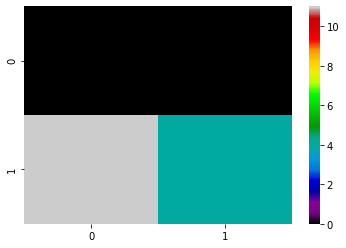

In [47]:
dc_constant_1 = DummyClassifier(strategy="constant", constant = 1.0)
constant_1 = Baseline_approach(dc_constant_1,X_train,X_test,y_train,y_test)

#### Gaussian Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09) 0.9333333333333333
f1 micro score = 0.9333333333333333
f1 macro score = 0.9068322981366459


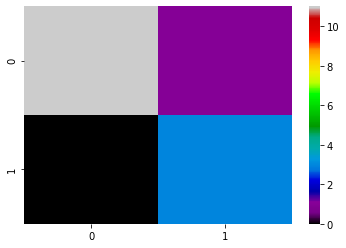

In [48]:
clf = GaussianNB()
GNB = Baseline_approach(clf,X_train,X_test,y_train,y_test)

#### kNN Classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 0.8
f1 micro score = 0.8000000000000002
f1 macro score = 0.7204968944099379


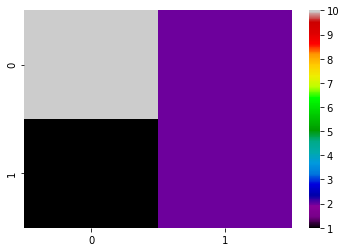

In [49]:
clf = KNeighborsClassifier()
Knn = Baseline_approach(clf,X_train,X_test,y_train,y_test)

### 2. Averaged metric bar plots

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


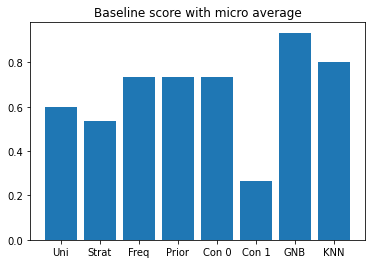

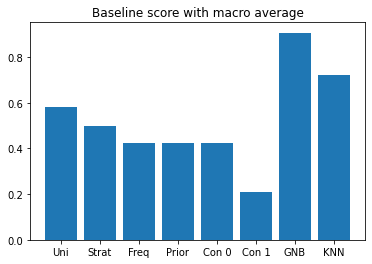

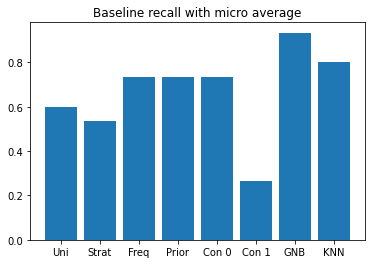

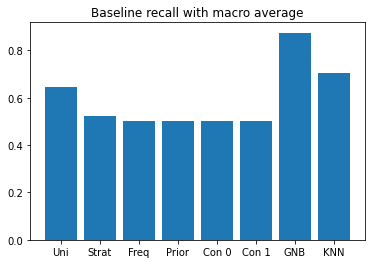

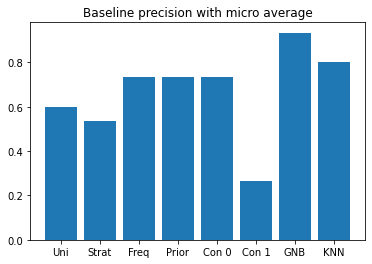

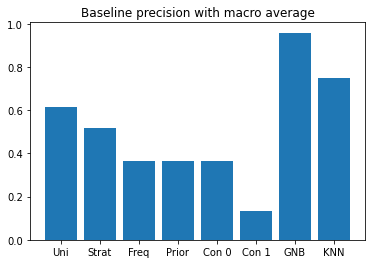

In [50]:
classifierlist = [uniform,stratified,most_frequent,prior,constant_0,constant_1,GNB,Knn]
averaged_plots(classifierlist,X_test,y_test,"Baseline")

### 3. Precision, Recall, F1 Scores

Στους αξιοσημείωτους classifiers (GNB, Knn) παρατηρούμε πως οι τιμές των precision και recall  δεν αλλάζουν πολύ. Τόσο το precision όσο το recall και το score είναι αρκετά ψηλά (μεγαλύτερα της τάξης του 80%) και απλώς σε micro averaging έχουμε λίγο μεγαλύτερες τιμές από ότι σε macro averaging.

## Βελτιστοποίηση ταξινομητών (micro)

Σε αυτό το απόσπασμα αξιολογούμε τις βέλτιστες παραμέτρους και την επιρροή τους στις επιδόσεις των ταξινομητών.


### Help Code

In [57]:
def grid_search(clf,parameters,X_train,X_test,y_train,y_test,verbose = 10,scoring = "f1_micro"):
    clf = GridSearchCV(clf,parameters, n_jobs = -1, cv = 10, verbose = verbose ,scoring = scoring)
    clf.fit(X_train,y_train)
    print(clf.best_estimator_)
    Best_clf = clf.best_estimator_.fit(X_train,y_train)
    print(Best_clf.score(X_test,y_test))
    return Best_clf

def Best_approach(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(str(classifier),classifier.score(X_test,y_test))
    print("f1 micro score =",f1_score(y_test, y_pred, average='micro'))
    cf_matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(cf_matrix, annot=False, cmap='nipy_spectral')
    return classifier

def best_plot(clfs,score1,score,function,approach):
    plt.bar(clfs,score1)
    plt.title(approach + " " + score + " with " + function + " average")
    plt.savefig(approach + "_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def best_averaged_plots(classifierlist,X_test,y_test,approach):
    clfs  = ['GNB','KNN']
    score_micro = []
    score_macro = []
    recall_micro = []
    recall_macro = []
    precision_micro = []
    precision_macro = []
    for classifier in classifierlist:        
        y_pred = classifier.predict(X_test)
        score_micro.append(f1_score(y_test, y_pred, average = 'micro'))
        recall_micro.append(recall_score(y_test, y_pred, average = "micro"))
        precision_micro.append(precision_score(y_test, y_pred, average = 'micro'))
       

    best_plot(clfs,score_micro,"score","micro",approach)
    best_plot(clfs,recall_micro,"recall","micro",approach)
    best_plot(clfs,precision_micro,"precision","micro",approach)

def difference_plot(clfs,score1,score,function,approach):
    plt.bar([1-.25/2],score1[0],width = .25)
    plt.bar([1+.25/2],score1[1],width = .25)
    plt.xticks([1],clfs)
    plt.title(approach + " for " + score + " with " + function + " average")
    plt.savefig(approach + "_for_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def difference_averaged_plots(classifierlist,bestclassifierlist,X_test,y_test,approach):
    clfs  = ['KNN']
    score_micro = [[],[]]
    score_macro = [[],[]]
    recall_micro = [[],[]]
    recall_macro = [[],[]]
    precision_micro = [[],[]]
    precision_macro = [[],[]]
    for i in range(1):
        base_y_pred = classifierlist[i].predict(X_test)
        best_y_pred = bestclassifierlist[i].predict(X_test)
        score_micro[0].append(f1_score(y_test, base_y_pred, average = 'micro'))
        recall_micro[0].append(recall_score(y_test, base_y_pred, average = "micro"))
        precision_micro[0].append(precision_score(y_test, base_y_pred, average = 'micro'))
        score_micro[1].append(f1_score(y_test, best_y_pred, average = 'micro'))
        recall_micro[1].append(recall_score(y_test, best_y_pred, average = "micro"))
        precision_micro[1].append(precision_score(y_test, best_y_pred, average = 'micro'))

    difference_plot(clfs,score_micro,"score","micro",approach)
    difference_plot(clfs,recall_micro,"recall","micro",approach)
    difference_plot(clfs,precision_micro,"precision","micro",approach)

### 1. Classifiers

#### kΝΝ Classifier
Hyperparameters: n_neighbors.

Βέλτιστες παράμετροι πρόκευψαν :


*   n_neighbors = 8



Score = 0.9333333333333333

In [ ]:
parameters =  {"n_neighbors": [i + 1 for i in range(10)]}
clf = KNeighborsClassifier(n_jobs = -1)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    6.1s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')
0.9333333333333333


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.4s finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform') 0.9333333333333333
f1 micro score = 0.9333333333333333
f1 macro score = 0.9068322981366459


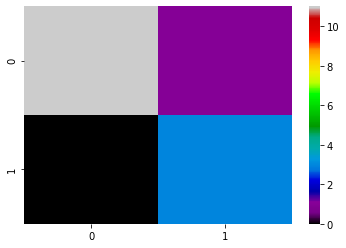

In [61]:
best_Knn = KNeighborsClassifier(n_neighbors = 8, n_jobs = -1)
Knn = Baseline_approach(best_Knn,X_train,X_test,y_train,y_test)

### 2. Final fit and running time

In [58]:
t = Texttable()

fit_times = []
predict_times = []
table = [['Classifier','Fit time (s)','Predict time (s)', 'Score']]
classifiernames = ["GNB","Knn"]
GNB = GaussianNB()
best_knn = KNeighborsClassifier(n_neighbors = 8, n_jobs = -1)
bestclassifierlist = [GNB,best_knn]

i = 0
for clf in bestclassifierlist:
    point1 = time.time()
    clf.fit(X_train,y_train)
    point2 = time.time()
    y_pred = clf.predict(X_test)
    point3 = time.time()
    fit_times.append(round(point2 - point1,8))
    predict_times.append(round(point3-point2,5))
    table.append([classifiernames[i],round(point2 - point1,8),round(point3-point2,8),clf.score(X_test,y_test)])

    i += 1

t.add_rows(table)
print(t.draw())

+------------+--------------+------------------+-------+
| Classifier | Fit time (s) | Predict time (s) | Score |
+============+==============+==================+=======+
| GNB        | 0.002        | 0.001            | 0.933 |
+------------+--------------+------------------+-------+
| Knn        | 0.001        | 0.106            | 0.933 |
+------------+--------------+------------------+-------+


### 3. Averaged metric bar plots

Δεν τυπώνουμε για τους dummy καθώς δεν έχουν ποιοτικό ενδιαφέρον.

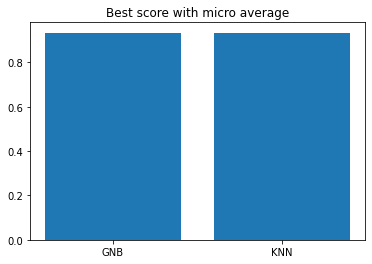

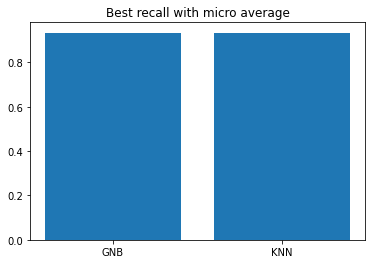

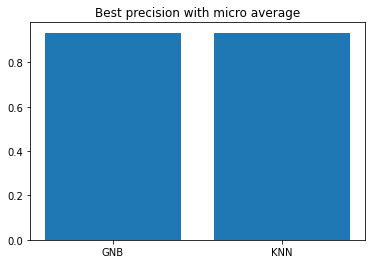

In [59]:
best_averaged_plots(bestclassifierlist,X_test,y_test,"Best")

### 4. Before And After Optimization

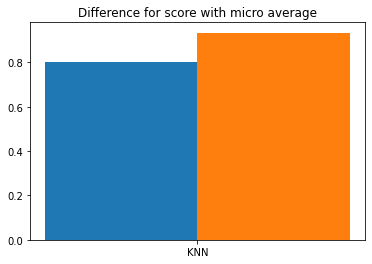

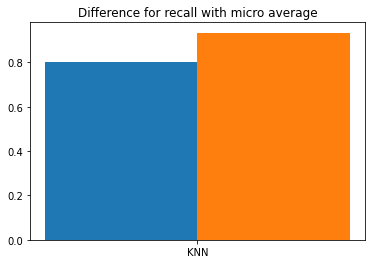

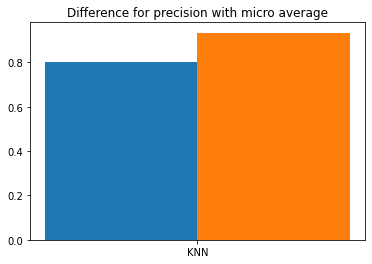

In [60]:
difference_averaged_plots(classifierlist[7:],bestclassifierlist[1:],X_test,y_test,"Difference")

### 5. Precision, Recall, F1 Scores, and more 



Με fine tuning καταφέρνουμε να ανεβάσουμε την επίδοση του ταξινομητή Knn τόσο ώστε να φτάνει και τον GNB στο score (93.3%) για την μετρική F1_micro. Παρατηρούμε και πάλι πώς έχουμε περίπου ίδιες τιμές precision και recall .

## Βελτιστοποίηση ταξινομητών (macro)

Σε αυτό το απόσπασμα αξιολογούμε τις βέλτιστες παραμέτρους και την επιρροή τους στις επιδόσεις των ταξινομητών.


### Help Code

In [72]:
def grid_search(clf,parameters,X_train,X_test,y_train,y_test,verbose = 10,scoring = "f1_macro"):
    clf = GridSearchCV(clf,parameters, n_jobs = -1, cv = 10, verbose = verbose ,scoring = "f1_macro")
    clf.fit(X_train,y_train)
    print(clf.best_estimator_)
    Best_clf = clf.best_estimator_.fit(X_train,y_train)
    print(Best_clf.score(X_test,y_test))
    return Best_clf

def Best_approach(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(str(classifier),classifier.score(X_test,y_test))
    print("f1 micro score =",f1_score(y_test, y_pred, average='micro'))
    print("f1 macro score =",f1_score(y_test, y_pred, average='macro'))
    cf_matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(cf_matrix, annot=False, cmap='nipy_spectral')
    return classifier

def best_plot(clfs,score1,score,function,approach):
    plt.bar(clfs,score1)
    plt.title(approach + " " + score + " with " + function + " average")
    plt.savefig(approach + "_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def best_averaged_plots(classifierlist,X_test,y_test,approach):
    clfs  = ['GNB','KNN']
    score_micro = []
    score_macro = []
    recall_micro = []
    recall_macro = []
    precision_micro = []
    precision_macro = []
    for classifier in classifierlist:        
        y_pred = classifier.predict(X_test)
        score_macro.append(f1_score(y_test, y_pred, average = 'macro'))        
        recall_macro.append(recall_score(y_test, y_pred, average = "macro"))        
        precision_macro.append(precision_score(y_test, y_pred, average = 'macro'))
       

    best_plot(clfs,score_macro,"score","macro",approach)
    best_plot(clfs,recall_macro,"recall","macro",approach)
    best_plot(clfs,precision_macro,"precision","macro",approach)

def difference_plot(clfs,score1,score,function,approach):
    plt.bar([1-.25/2],score1[0],width = .25)
    plt.bar([1+.25/2],score1[1],width = .25)
    plt.xticks([1],clfs)
    plt.title(approach + " for " + score + " with " + function + " average")
    plt.savefig(approach + "_for_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def difference_averaged_plots(classifierlist,bestclassifierlist,X_test,y_test,approach):
    clfs  = ['KNN']
    score_micro = [[],[]]
    score_macro = [[],[]]
    recall_micro = [[],[]]
    recall_macro = [[],[]]
    precision_micro = [[],[]]
    precision_macro = [[],[]]
    for i in range(1):
        base_y_pred = classifierlist[i].predict(X_test)
        best_y_pred = bestclassifierlist[i].predict(X_test)
        score_macro[0].append(f1_score(y_test, base_y_pred, average = 'macro'))        
        recall_macro[0].append(recall_score(y_test, base_y_pred, average = "macro"))        
        precision_macro[0].append(precision_score(y_test, base_y_pred, average = 'macro'))
        score_macro[1].append(f1_score(y_test, best_y_pred, average = 'macro'))        
        recall_macro[1].append(recall_score(y_test, best_y_pred, average = "macro"))        
        precision_macro[1].append(precision_score(y_test, best_y_pred, average = 'macro'))

    difference_plot(clfs,score_macro,"score","macro",approach)
    difference_plot(clfs,recall_macro,"recall","macro",approach)
    difference_plot(clfs,precision_macro,"precision","macro",approach)

### 1. Classifiers

#### kΝΝ Classifier
Hyperparameters: n_neighbors.

Βέλτιστες παράμετροι πρόκευψαν :


*   n_neighbors = 5



Score = 0.9068322981366459

In [64]:
parameters =  {"n_neighbors": [i for i in range(10)]}
clf = KNeighborsClassifier(n_jobs = -1)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0082s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0082s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0133s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.8s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')
0.9333333333333333


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform') 0.9333333333333333
f1 micro score = 0.9333333333333333
f1 macro score = 0.9068322981366459


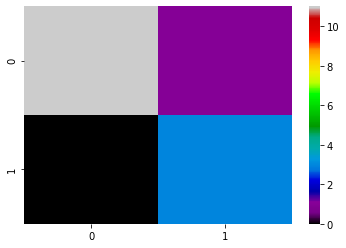

In [65]:
best_Knn = KNeighborsClassifier(n_neighbors = 8, n_jobs = -1)
Knn = Baseline_approach(best_Knn,X_train,X_test,y_train,y_test)

### 2. Final fit and running time

In [66]:
t = Texttable()

fit_times = []
predict_times = []
table = [['Classifier','Fit time (s)','Predict time (s)', 'Score']]
classifiernames = ["GNB","Knn"]
GNB = GaussianNB()
best_knn = KNeighborsClassifier(n_neighbors = 8, n_jobs = -1)
bestclassifierlist = [GNB,best_knn]

i = 0
for clf in bestclassifierlist:
    point1 = time.time()
    clf.fit(X_train,y_train)
    point2 = time.time()
    y_pred = clf.predict(X_test)
    point3 = time.time()
    fit_times.append(round(point2 - point1,8))
    predict_times.append(round(point3-point2,5))
    table.append([classifiernames[i],round(point2 - point1,8),round(point3-point2,8),clf.score(X_test,y_test)])

    i += 1

t.add_rows(table)
print(t.draw())

+------------+--------------+------------------+-------+
| Classifier | Fit time (s) | Predict time (s) | Score |
+============+==============+==================+=======+
| GNB        | 0.002        | 0.000            | 0.933 |
+------------+--------------+------------------+-------+
| Knn        | 0.001        | 0.106            | 0.933 |
+------------+--------------+------------------+-------+


### 3. Averaged metric bar plots

Δεν τυπώνουμε για τους dummy καθώς δεν έχουν ποιοτικό ενδιαφέρον.

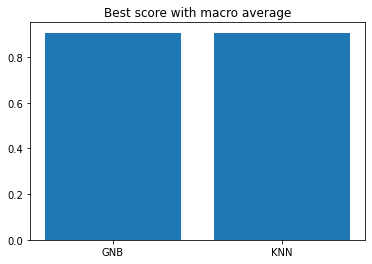

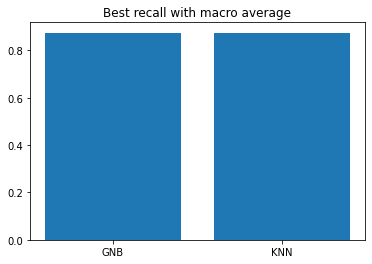

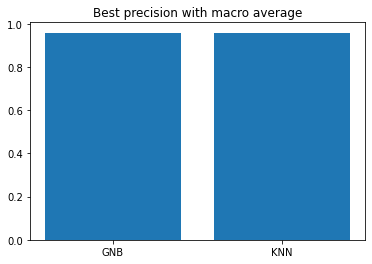

In [73]:
best_averaged_plots(bestclassifierlist,X_test,y_test,"Best")

### 4. Before And After Optimization

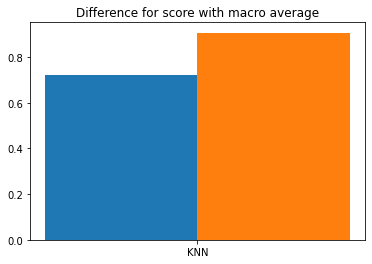

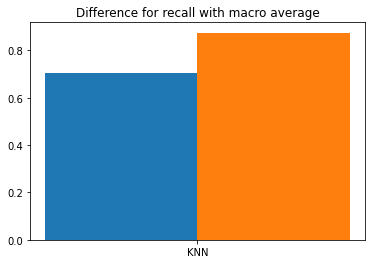

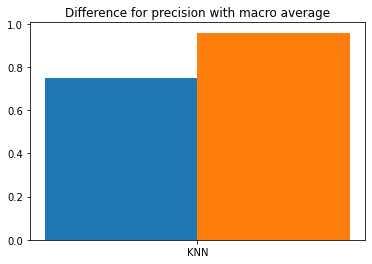

In [74]:
difference_averaged_plots(classifierlist[7:],bestclassifierlist[1:],X_test,y_test,"Difference")

### 5. Precision, Recall, F1 Scores, and more 



Με fine tuning βελτιώνουμε τον Knn αλγόριθμος ώστε να έχει την ίδια συμπεριφορά με τον GNB (ποσοτικά, με διαφορετικά test δεδομένα θα διέφεραν). Παρατηρούμε και πάλι πώς έχουμε περίπου ίδιες τιμές precision και recall.

# Μεγάλο dataset (ISOLET)


## Βασικές πληροφορίες

### 1. Σύντομη παρουσίαση του dataset:

Το classification task είναι η ταξινόμηση ονόματος-γράμματος από σήμα φωνής. Το dataset προέκυψε από 150 ανθρώπους οι οποίοι διάβασαν ολογογράφως τα γράμματα του Αγγλικού αλφαβήτου από 2 φορές το καθένα. 


In [75]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/isolet/isolet1+2+3+4.data.Z" &> /dev/null
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/isolet/isolet5.data.Z" &> /dev/null

!gzip -d -f *.Z &> /dev/null


### 2. Δειγμάτα και Χαρακτηριστικά

Το συγκεκριμένο dataset είναι ήδη χωρισμένο σε train και test data. Έχουμε 6238 train samples και 1559 test samples, σύνολο άρα 7797. Το κάθε δείγμα περιλαμβάνει 617 features τα οποία είναι όλα αριθμητικές τιμές. Τα features αυτά προέκυψαν από διαφορετικές αναλύσεις όπως:
*italicized text*
*   Spectral coefficients,
*   Contour features,
*   Sonorant features,
*   Pre-sonorant features,
*   Post-sonorant features.






In [76]:
train_data = pd.read_csv("isolet1+2+3+4.data", header=None)
print(train_data.shape)

test_data = pd.read_csv("isolet5.data", header=None)
print(test_data.shape)
# test_data.head()


(6238, 618)
(1559, 618)


### 3. Επικεφαλίδες

Δεν υπάρχουν επικεφαλίδες και η αρίθμηση γραμμών γίνεται από τη βιβλιοθήκη pandas. 

In [77]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,-0.2958,-0.2704,-0.2620,-0.2170,-0.0874,-0.0564,0.0254,0.0958,0.4226,0.6648,0.9184,0.9718,0.9324,0.7070,0.6986,0.7550,0.8816,1.0000,0.9380,0.8450,0.7268,0.5578,-0.4330,-0.1982,0.1270,0.3666,0.4496,0.4258,0.2646,-0.0368,...,1.0,-1.0,-1.0,-1.0,-1.0,0.1334,-1.0,-0.0770,0.0512,0.2564,0.5642,0.4872,0.0770,0.4358,0.7436,0.5128,0.6666,0.6410,0.6154,1.0000,0.8206,0.6410,0.3590,0.6924,0.4358,0.1538,0.4616,0.6154,0.3334,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,-0.0964,-0.2084,-0.0494,-0.0494,-0.2942,0.0704,0.0546,0.1302,0.5652,0.6848,0.7760,0.9558,0.8542,0.7474,0.6094,0.7708,0.8282,1.0000,0.9974,0.9480,0.7422,0.5678,-0.2196,0.1090,0.5892,0.8768,1.0000,0.9936,0.7852,0.3712,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,0.0228,-0.0910,0.2728,0.8636,0.7500,0.4318,0.7272,0.6590,0.4090,0.7728,1.0000,0.7272,0.4772,0.4772,0.4772,0.6590,0.1818,0.4318,0.3864,0.8410,0.8864,0.2500,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,-0.7228,-0.6312,-0.4986,-0.7080,-0.6666,-0.5428,-0.4130,-0.3776,-0.0472,0.1356,0.6136,0.8024,1.0000,0.9794,0.9352,0.8732,0.9440,0.9588,0.6962,0.4838,0.3982,0.2064,-0.3270,0.0134,0.3620,0.3218,-0.4558,-0.8096,-0.7748,-0.7238,...,-1.0,1.0,-0.8,-1.0,-0.6,-0.8334,-1.0,-0.4286,-0.2540,-0.3650,-0.0952,-0.0794,0.0318,-0.2064,0.0634,0.1112,0.1746,0.2380,0.1904,0.5080,0.5396,0.0318,-0.0158,0.7142,1.0000,0.4126,-0.0794,-0.0476,0.0000,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,-0.7374,-0.7084,-0.6772,-0.6338,-0.6482,-0.6240,-0.3976,-0.5662,-0.2168,0.0458,0.3832,0.6168,0.8988,1.0000,0.9156,0.8796,0.9132,0.7132,0.7590,0.7278,0.5856,0.5060,-0.3710,-0.0868,0.4114,0.3438,-0.1816,-0.5964,-0.6888,-0.6686,...,-1.0,1.0,-1.0,-1.0,-1.0,-0.8334,-1.0,-0.2374,-0.5396,0.1798,0.2086,0.0792,0.0360,0.3238,0.3956,0.4100,0.2662,0.5252,0.3670,0.9136,1.0000,0.4100,0.1224,0.5252,0.4388,0.0216,-0.0792,0.3812,0.2806,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,-0.5472,-0.5440,-0.4494,-0.2332,-0.2332,-0.1148,0.0068,0.0778,0.4864,0.9054,0.9560,0.7602,0.7770,0.7636,0.8818,1.0000,0.9426,0.7162,0.5472,0.4122,0.2770,0.2364,-0.4684,-0.1394,0.4210,0.4316,-0.3106,-0.5448,-0.5132,-0.6368,...,1.0,-1.0,-1.0,-1.0,-1.0,1.0000,-1.0,0.2500,0.5000,0.0624,0.3438,0.2500,0.2500,0.6250,0.2500,0.5312,0.4376,0.4688,0.5626,0.5938,0.3438,0.5626,0.2500,1.0000,0.9376,0.3438,0.2812,-0.0312,0.4376,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0


### 4. Ετικέτες κλάσεων 

Οι ετικέτες των κλάσεψων βρίσκονται στο τελευταίο column (617) του dataframe. Τα δεδομένα είναι με την σειρά και άρα τα labels τα βλέπουμε να εμβανίζονται με την σειρά ως 
1.   1.0 (δηλαδή Alpha)
2.   2.0 (δηλαδή Beta)

 ...

26. 26.0 (δηλαδή Zed)



In [78]:
print(train_data[:][617])

0        1.0
1        1.0
2        2.0
3        2.0
4        3.0
        ... 
6233    22.0
6234    23.0
6235    24.0
6236    25.0
6237    26.0
Name: 617, Length: 6238, dtype: float64


### 5. Μετατροπές στα αρχεία

 Τα αρχεία δίνοντα σε .Z compress format και με αποσυμπίεση λαμβάνουμε αρχεία σε .data format. Αυτό συνεπάγεται πως δεν χρειάζεται να κάνουμε κάποια μετατροπή.


### 6. Απουσιάζουσες τιμές και δείγματα

Στο dataset μας έχουν απορριφθεί 3 από τα αρχικά δείγματα με αποτέλεσμα το πλήθος των δειγμάτων μας να είναι 7797 έναντι του 7800  
( 150 άνθρωποι * 52 αναγνώσεις γραμμάτων). Δεν υπάρχουν αποσιάζουσες τιμές. Αξίζει να σημειωθεί πως έχουμε ήδη κανονικοποιημένες όλες τις τιμές των χαρακτηριτικών.


### 7. Αριθμός κλάσεων, ποσοστά δειγμάτων και ισορροπία του dataset.

Σε ακολουθία των παραπάνω καταννούμε ότι οι κλάσεις είναι 26, όσα τα γράμματα του λατινικού αλφαβήτου, ο αριθμός των δείγματων κάθε κλάσης είναι περίπου ίσος ( δίοτι όπως αναφέραμε 3 δείγματα δεν συμπεριλήφθηκαν) και άρα το dataset είναι ισορροπημένο. Συγκεκριμένα προκύπτουν οι εξής πληθικότητες στο dataset:

In [79]:
features_train = train_data.iloc[:, :617]
features_train = features_train.values

labels_train = train_data.iloc[:, [617]]
labels_train = labels_train.values[:,0]

features_test = test_data.iloc[:, :617]
features_test = features_test.values

labels_test = test_data.iloc[:, [617]]
labels_test = labels_test.values[:,0]

unique1, counts1 = np.unique(labels_train, return_counts=True)
unique2, counts2 = np.unique(labels_test, return_counts=True)

print("Dict with key the letter-associated number and value the multiplicity of the class in the dataset")
dict(zip(unique1, counts1 + counts2))

Dict with key the letter-associated number and value the multiplicity of the class in the dataset


{1.0: 300,
 2.0: 300,
 3.0: 300,
 4.0: 300,
 5.0: 300,
 6.0: 298,
 7.0: 300,
 8.0: 300,
 9.0: 300,
 10.0: 300,
 11.0: 300,
 12.0: 300,
 13.0: 299,
 14.0: 300,
 15.0: 300,
 16.0: 300,
 17.0: 300,
 18.0: 300,
 19.0: 300,
 20.0: 300,
 21.0: 300,
 22.0: 300,
 23.0: 300,
 24.0: 300,
 25.0: 300,
 26.0: 300}

### 8. Διαχωρισμός train και test set.

Τα δεδομένα μας έχουν ήδη δωθεί χωρισμένα σε train και test. Όμως δεν ικανοποιούνται οι απαιτήσεις μας για τον % χωρισμό του dataset. Συγκεκριμένα ο υπάρχον χωρισμός δίνει 80% train set ενώ θέλουμε 70%. Τα χωρίζουμε λοιπόν με τυχαίο τρόπο.

In [80]:
X_all = np.concatenate((features_train,features_test))
y_all = np.concatenate((labels_train,labels_test))
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state = 5)


##Baseline Classification

Σε αυτό το απόσπασμα εξετάζουμε το πρόβλημα χωρίς την εύρεση βέλτιστων παραμέτρων.


### Help Code

In [82]:
def Baseline_approach(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(str(classifier),classifier.score(X_test,y_test))
    print("f1 micro score =",f1_score(y_test, y_pred, average='micro'))
    print("f1 macro score =",f1_score(y_test, y_pred, average='macro'))
    # print(confusion_matrix(y_pred,y_test))
    cf_matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(cf_matrix, annot=False, cmap='nipy_spectral')
    return classifier

def plot(clfs,score1,score,function,approach):
    plt.bar(clfs,score1)
    plt.title(approach + " " + score + " with " + function + " average")
    plt.savefig(approach + "_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def averaged_plots(classifierlist,X_test,y_test,approach):
    clfs  = ['Uniform', 'Stratified', 'GNB', 'KNN', 'MLP', 'SVM', 'LinearSVM']
    score_micro = []
    score_macro = []
    recall_micro = []
    recall_macro = []
    precision_micro = []
    precision_macro = []
    for classifier in classifierlist:        
        y_pred = classifier.predict(X_test)
        score_micro.append(f1_score(y_test, y_pred, average = 'micro'))
        score_macro.append(f1_score(y_test, y_pred, average = 'macro'))        
        recall_micro.append(recall_score(y_test, y_pred, average = "micro"))
        recall_macro.append(recall_score(y_test, y_pred, average = "macro"))        
        precision_micro.append(precision_score(y_test, y_pred, average = 'micro'))
        precision_macro.append(precision_score(y_test, y_pred, average = 'macro'))
       

    plot(clfs,score_micro,"score","micro",approach)
    plot(clfs,score_macro,"score","macro",approach)
    plot(clfs,recall_micro,"recall","micro",approach)
    plot(clfs,recall_macro,"recall","macro",approach)
    plot(clfs,precision_micro,"precision","micro",approach)
    plot(clfs,precision_macro,"precision","macro",approach)

### 1. Classifiers

#### Dummy Classifiers



DummyClassifier(constant=None, random_state=None, strategy='uniform') 0.03547008547008547
f1 micro score = 0.03290598290598291
f1 macro score = 0.032393886255904836


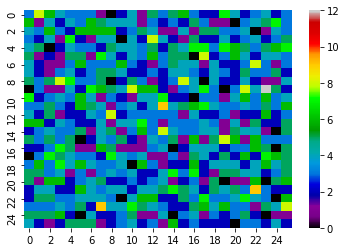

In [100]:
dc_uniform = DummyClassifier(strategy="uniform")
uniform = Baseline_approach(dc_uniform,X_train,X_test,y_train,y_test)

DummyClassifier(constant=None, random_state=None, strategy='stratified') 0.038461538461538464
f1 micro score = 0.038461538461538464
f1 macro score = 0.03857750233586437


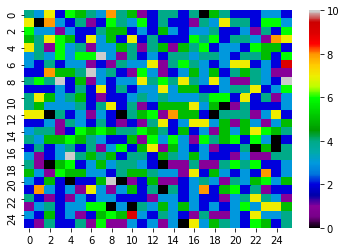

In [101]:
dc_stratified = DummyClassifier(strategy="stratified")
stratified = Baseline_approach(dc_stratified,X_train,X_test,y_train,y_test)

#### Gaussian Naive Bayes Classifier


GaussianNB(priors=None, var_smoothing=1e-09) 0.7923076923076923
f1 micro score = 0.7923076923076923
f1 macro score = 0.7756392656134692


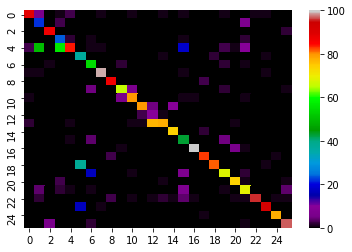

In [102]:
classifier = GaussianNB()
GNB = Baseline_approach(classifier,X_train,X_test,y_train,y_test)

#### kΝΝ Classifier
Default τιμές: K = 5

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform') 0.8901709401709401
f1 micro score = 0.8901709401709401
f1 macro score = 0.8889626260213872


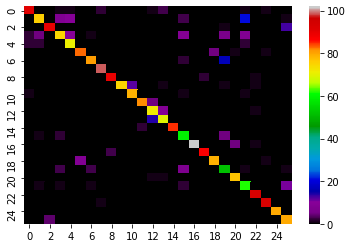

In [103]:
classifier = KNeighborsClassifier(n_jobs = -1)
Knn = Baseline_approach(classifier,X_train,X_test,y_train,y_test)

#### Multi-Layer Perceptron (MLP)

Default τιμές: activation = relu , size = 100, alpha = .0001, learning rate = 'constant', solver = 'adam'

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 0.9623931623931624
f1 micro score = 0.9623931623931624
f1 macro score = 0.9624984829654794


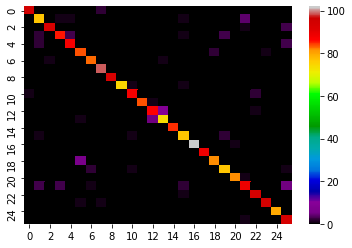

In [104]:
classifier = MLPClassifier()
MLP = Baseline_approach(classifier,X_train,X_test,y_train,y_test)

#### Support Vector Machines (SVM)

Default τιμές nonLinear: kernel = 'rbf', C = 1, gamma = scale, degree = 3, tol = 0.001.

Default τιμές Linear: loss =  'squared_hinge', tol = 0.0001, C = 1.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 0.9636752136752137
f1 micro score = 0.9636752136752137
f1 macro score = 0.9637477912550522


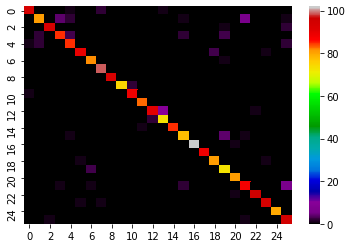

In [105]:
classifier = SVC()
SVM = Baseline_approach(classifier,X_train,X_test,y_train,y_test)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) 0.9538461538461539
f1 micro score = 0.9538461538461539
f1 macro score = 0.953401545937928


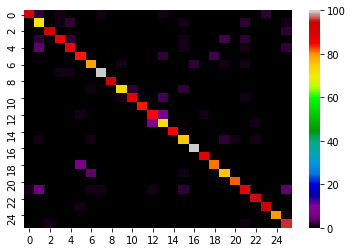

In [106]:
classifier = LinearSVC(dual = False)
linearSVM = Baseline_approach(classifier,X_train,X_test,y_train,y_test)

### 2. Averaged metric bar plots

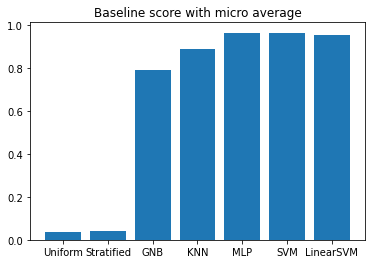

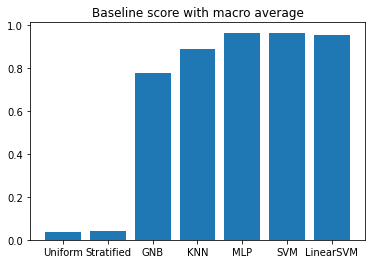

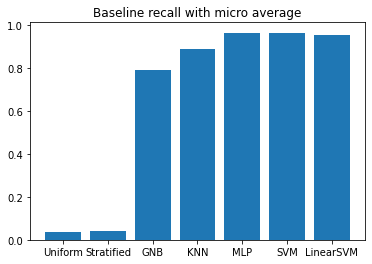

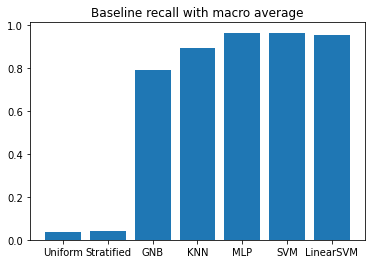

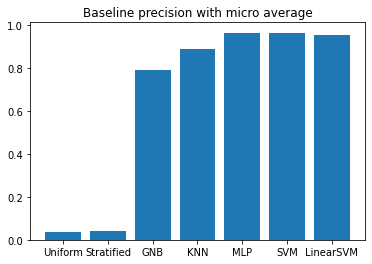

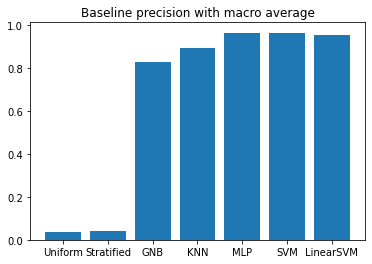

In [107]:
classifierlist = [uniform,stratified,GNB,Knn,MLP,SVM,linearSVM]
averaged_plots(classifierlist,X_test,y_test,"Baseline")

### 3. Precision, Recall, F1 Scores

Ακόμα και χωρίς fine tuning το task μας φαίνεται πως είναι αρκετά απλό. Παρατηρούμε πώς στους περισσότερους ταξινομητές τόσο σε micro όσο και se macro level έχουμε τα περίπου τα ίδια precision και recall. Αυτό είναι αναμενόμενο διότι είναι εξίσου πιθανό να κάνεις λάθος δύο γράμματα μεταξύ τους, δηλαδή π.χ. το να θεωρήσεις το m ως n και το n ως m είναι περίπου ισοπίθανο (αυτό φαίνεται και από την συμμετρία των confusion matrix). Οι επιδόσεις των αξιόλογων ταξινομητών ξεκινούν από το 79% και φτάνουν έως και 96% 

## Βελτιστοποίηση ταξινομητών (micro)

Σε αυτό το απόσπασμα αξιολογούμε τις βέλτιστες παραμέτρους και την επιρροή τους στις επιδόσεις των ταξινομητών.


### Help Code

In [94]:
def grid_search(clf,parameters,X_train,X_test,y_train,y_test,verbose = 10,scoring = "fi_micro"):
    clf = GridSearchCV(clf,parameters, n_jobs = -1, cv = 10, verbose = verbose ,scoring = "f1_micro")
    clf.fit(X_train,y_train)
    print(clf.best_estimator_)
    Best_clf = clf.best_estimator_.fit(X_train,y_train)
    print(Best_clf.score(X_test,y_test))
    return Best_clf

def Best_approach(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(str(classifier),classifier.score(X_test,y_test))
    print("f1 micro score =",f1_score(y_test, y_pred, average='micro'))
    print("f1 macro score =",f1_score(y_test, y_pred, average='macro'))
    # print(confusion_matrix(y_pred,y_test))
    cf_matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(cf_matrix, annot=False, cmap='nipy_spectral')
    return classifier

def best_plot(clfs,score1,score,function,approach):
    plt.bar(clfs,score1)
    plt.title(approach + " " + score + " with " + function + " average")
    plt.savefig(approach + "_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def best_averaged_plots(classifierlist,X_test,y_test,approach):
    clfs  = ['KNN', 'MLP', 'SVM', 'LinearSVM']
    score_micro = []
    score_macro = []
    recall_micro = []
    recall_macro = []
    precision_micro = []
    precision_macro = []
    for classifier in classifierlist:        
        y_pred = classifier.predict(X_test)
        score_micro.append(f1_score(y_test, y_pred, average = 'micro'))
        recall_micro.append(recall_score(y_test, y_pred, average = "micro"))
        precision_micro.append(precision_score(y_test, y_pred, average = 'micro'))
       

    best_plot(clfs,score_micro,"score","micro",approach)
    best_plot(clfs,recall_micro,"recall","micro",approach)
    best_plot(clfs,precision_micro,"precision","micro",approach)

def difference_plot(clfs,score1,score,function,approach):
    plt.bar([1-.25/2, 2-.25/2, 3-.25/2, 4-.25/2],score1[0],width = .25)
    plt.bar([1+.25/2, 2+.25/2, 3+.25/2, 4+.25/2],score1[1],width = .25)
    plt.xticks([1,2,3,4],clfs)
    plt.title(approach + " for " + score + " with " + function + " average")
    plt.savefig(approach + "_for_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def difference_averaged_plots(classifierlist,bestclassifierlist,X_test,y_test,approach):
    clfs  = ['KNN', 'MLP', 'SVM', 'LinearSVM']
    score_micro = [[],[]]
    score_macro = [[],[]]
    recall_micro = [[],[]]
    recall_macro = [[],[]]
    precision_micro = [[],[]]
    precision_macro = [[],[]]
    for i in range(4):
        base_y_pred = classifierlist[i].predict(X_test)
        best_y_pred = bestclassifierlist[i].predict(X_test)
        score_micro[0].append(f1_score(y_test, base_y_pred, average = 'micro'))
        recall_micro[0].append(recall_score(y_test, base_y_pred, average = "micro"))
        precision_micro[0].append(precision_score(y_test, base_y_pred, average = 'micro'))
        score_micro[1].append(f1_score(y_test, best_y_pred, average = 'micro'))
        recall_micro[1].append(recall_score(y_test, best_y_pred, average = "micro"))
        precision_micro[1].append(precision_score(y_test, best_y_pred, average = 'micro'))

    difference_plot(clfs,score_micro,"score","micro",approach)
    difference_plot(clfs,recall_micro,"recall","micro",approach)
    difference_plot(clfs,precision_micro,"precision","micro",approach)

### 1. Classifiers

#### kΝΝ Classifier


Hyperparameters: n_neighbors, metric, weights.

Βέλτιστες παράμετροι πρόκευψαν :


*   n_neighbors = 7
*   metric = euclidean
*   weights = distance


Score = 0.9064102564102564

In [ ]:
parameters =  {'metric':('euclidean', 'manhattan', 'chebyshev'), 'weights':("uniform","distance"), "n_neighbors": [1, 3, 5, 7]}
clf = KNeighborsClassifier(n_jobs = -1)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  7

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='distance')
0.9064102564102564


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='distance') 0.9064102564102564
f1 micro score = 0.9064102564102564
f1 macro score = 0.9055599300249125


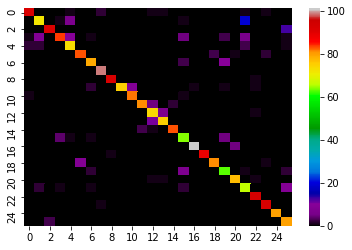

In [20]:
best_knn = KNeighborsClassifier(n_neighbors = 7 , metric = 'euclidean', weights = "distance", n_jobs = -1)
_ = Baseline_approach(best_knn, X_train,X_test,y_train,y_test)

#### Multi-Layer Perceptron (MLP)



Hyperparameters: hidden_layer_sizes, activation, solver, max_iter, learning_rate, alpha.

Βέλτιστοι παράμετροι προέκυψαν οι εξής:
*   activation = relu 
*   alpha = 0.0001
*   hidden_layer_sizes = 128
*   learning_rate = constant
*   max_iter = 200
*   solver = adam

Accuracy = 0.9666666666666667

Για την βελτιστοποιηση του MLP αρχικώς δοκιμάσαμε ένα ευρύ gridsearch και στην συνέχεια αφού επιλέξαμε ορισμένες μεταβλητές ως αρχικοποίηση τρέξαμε από ένα gridsearch για κάθε επιμέρους παράμετρο. Αυτο το κάναμε διότι έτρεχε εξαντλητικά αργά η εκπαίδευση του νευρωνικού

In [ ]:
parameters =  {'hidden_layer_sizes':[8,16], "activation": ('logistic', 'tanh', 'relu'), "solver": ("lbfgs", "sgd", "adam"), "max_iter": [100, 200], "learning_rate": ('constant', 'invscaling'), "alpha": [.001,.0001]}
clf = MLPClassifier()

grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  7

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=16, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.955982905982906


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  is_stopping = self._optimizer.trigger_stopping(


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=16, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
parameters =  {'hidden_layer_sizes':[8,16,32,64,128,256,512]}
clf = MLPClassifier(activation='relu',solver='adam',max_iter=200,learning_rate='invscaling',alpha=.0001)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 14.2min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.9636752136752137


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
parameters =  {'learning_rate':('constant','invscaling')}
clf = MLPClassifier(hidden_layer_sizes = 128, activation='relu',solver='adam',max_iter=200,alpha=.0001)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.8min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.964957264957265


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
parameters =  {'max_iter':[100,200,400]}
clf = MLPClassifier(hidden_layer_sizes = 128, activation='relu',learning_rate='constant',solver='adam',alpha=.0001)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.8min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.9666666666666667


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
parameters =  {"alpha": [0,.001,.0001] }
clf = MLPClassifier(hidden_layer_sizes = 128, activation='relu',learning_rate='constant',solver='adam',max_iter = 200)
grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.8min finished


MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.9653846153846154


MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 0.9645299145299145
f1 micro score = 0.9645299145299144
f1 macro score = 0.9644430904900785


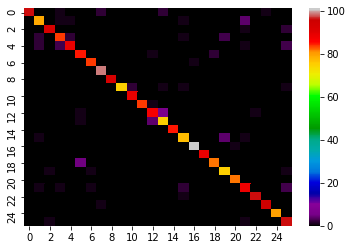

In [89]:
best_MLP = MLPClassifier(activation = 'relu' , alpha = 0.0001, hidden_layer_sizes = 128, max_iter = 200, learning_rate = "constant", solver = 'adam')
_ = Baseline_approach(best_MLP, X_train,X_test,y_train,y_test)

#### Support Vector Machines (SVM)



##### Linear Kernel:

Hyperparameters: loss, tol, C.

Βέλτιστοι παράμετροι προέκυψαν οι εξής:

*   loss = squared_hinge
*   tol = 0.0001
*   C = 0.1

Accuracy = 0.958974358974359


In [ ]:
clf = LinearSVC(dual = False)
parameters = {'loss': ('hinge', 'squared_hinge'), 'tol': [0,.001,.0001], 'C': [.1,1,10]}
grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1812s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0679s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Batch computation too slow (8.0832s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1753s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch compu

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
0.958974358974359


LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) 0.958974358974359
f1 micro score = 0.958974358974359
f1 macro score = 0.958544359919671


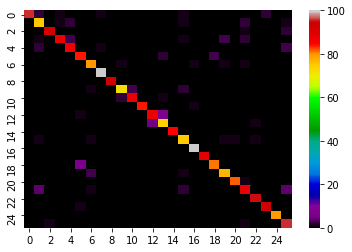

In [90]:
best_Linearsvm = LinearSVC(loss = 'squared_hinge',tol = 0.0001,C = .1 ,dual = False)
_ = Baseline_approach(best_Linearsvm, X_train,X_test,y_train,y_test)

##### Poly & Rbf Kernels: 

Hyperparameters: kernel, C, degree, gamma, tol

Βέλτιστοι παράμετροι προέκυψαν οι εξής:

*   kernel = rbf
*   C = 10
*   tol = 0.001
*   degree = 2
*   gamma = scale

Accuracy = 0.9722222222222222

In [ ]:
clf = SVC()
parameters = {'kernel': ('poly’', 'rbf'), 'degree': [2,3,4],"gamma": ('scale', 'auto'), 'tol': [.001,.0001], 'C': [.1,1,10]}
grid_search(clf,parameters,X_train,X_test,y_train,y_test,10)


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1914s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (48.2360s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  9.1min
[Parallel(n_j

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.9722222222222222


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 0.9722222222222222
f1 micro score = 0.9722222222222222
f1 macro score = 0.972449275377252


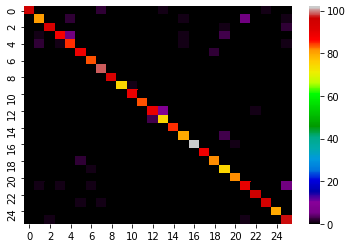

In [92]:
best_svm = SVC(kernel = 'rbf',tol = 0.001, C = 10,degree = 2, gamma = 'scale' )
_ = Baseline_approach(best_svm, X_train,X_test,y_train,y_test)

### 2. Final fit and running time

Αναμένουμε μεγάλο χρόνο εκπαίδευσης στο νευρωνικό και τις δύο μεθόδους SVM, ενώ μεγάλο χρόνο εκτέλεσης στην μέθοδο Knn. Οι χρόνοι εκτέλεσης εκπαίδευσης και πρόβλεψης των βέλιστων classifiers προκύπτουν:

In [93]:
t = Texttable()

fit_times = []
predict_times = []
table = [['Classifier','Fit time (s)','Predict time (s)', 'Score']]
classifiernames = ["GNB","Knn","MLP","SVM","LinearSVM"]
GNB = GaussianNB()
best_knn = KNeighborsClassifier(n_neighbors = 7 , metric = 'euclidean', weights = "distance", n_jobs = -1)
best_mlp = MLPClassifier(activation = "relu", alpha = 0.0001, hidden_layer_sizes = 128, learning_rate = "constant", max_iter = 200, solver = "adam")
best_Linearsvm =  LinearSVC(loss = 'squared_hinge', tol = 0.0001, C = .1, dual = False)
best_Svm = SVC(kernel = 'rbf', C = 10, tol = .001, degree = 2, gamma = 'scale')
bestclassifierlist = [GNB,best_knn,best_mlp,best_Svm,best_Linearsvm]

i = 0
for clf in bestclassifierlist:
    point1 = time.time()
    clf.fit(X_train,y_train)
    point2 = time.time()
    y_pred = clf.predict(X_test)
    point3 = time.time()
    fit_times.append(round(point2 - point1,3))
    predict_times.append(round(point3-point2,3))
    table.append([classifiernames[i],round(point2 - point1,3),round(point3-point2,3),clf.score(X_test,y_test)])

    i += 1

t.add_rows(table)
print(t.draw())

+------------+--------------+------------------+-------+
| Classifier | Fit time (s) | Predict time (s) | Score |
+============+==============+==================+=======+
| GNB        | 0.051        | 0.190            | 0.792 |
+------------+--------------+------------------+-------+
| Knn        | 0.420        | 12.135           | 0.906 |
+------------+--------------+------------------+-------+
| MLP        | 17.870       | 0.021            | 0.962 |
+------------+--------------+------------------+-------+
| SVM        | 8.521        | 8.317            | 0.972 |
+------------+--------------+------------------+-------+
| LinearSVM  | 8.198        | 0.007            | 0.959 |
+------------+--------------+------------------+-------+


### 3. Averaged metric bar plots

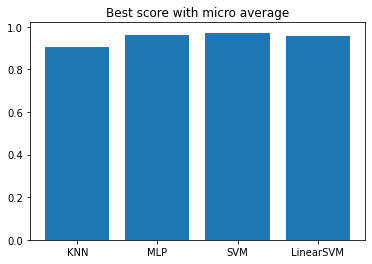

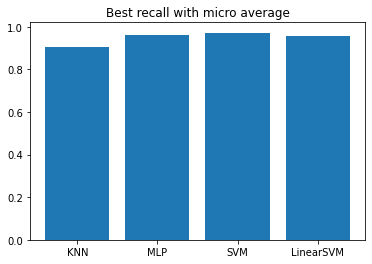

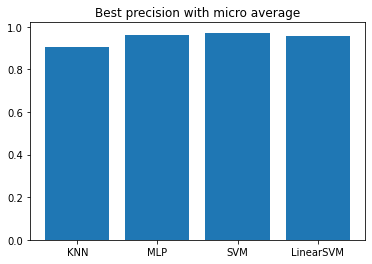

In [95]:
best_averaged_plots(bestclassifierlist[1:],X_test,y_test,"Best")

### 4. Before And After Optimization

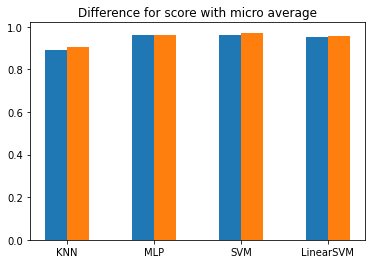

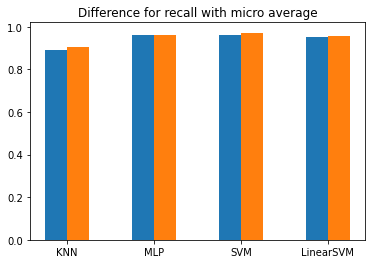

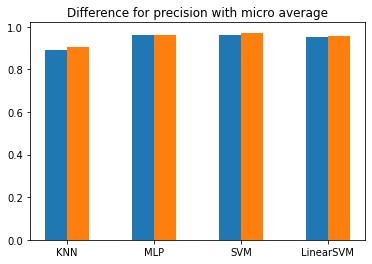

In [110]:
difference_averaged_plots(classifierlist[3:],bestclassifierlist[1:],X_test,y_test,"Difference")

### 5. Precision, Recall, F1 Scores, and more 



Όπως σχολιάσαμε και προηγουμένως το classification πρόβλημα που αντιμετωπίζουμε είναι αρκετά εύκολο. Με fine tuning καταφέρνουμε να ανεβάσουμε τις επιδόσεις των ταξινομητών σε ποσοστό της τάξης του 0.5%. Παρατηρούμε και πάλι πώς έχουμε περίπου ίδιες τιμές precision και recall. Οι επιδόσεις των βέλτιστων ταξινομητών ξεκινούν από το 80% και φτάνουν έως και 97% 

## Βελτιστοποίηση ταξινομητών (macro)

Σε αυτό το απόσπασμα αξιολογούμε τις βέλτιστες παραμέτρους και την επιρροή τους στις επιδόσεις των ταξινομητών.


### Help Code

In [112]:
def grid_search(clf,parameters,X_train,X_test,y_train,y_test,verbose = 10, scoring = 'f1_macro'):
    clf = GridSearchCV(clf,parameters, n_jobs = -1, cv = 5, verbose = verbose, scoring = "f1_macro")
    clf.fit(X_train,y_train)
    print(clf.best_estimator_)
    Best_clf = clf.best_estimator_.fit(X_train,y_train)
    y_pred = Best_clf.predict(X_test)
    print(f1_score(y_test,y_pred,average = 'macro'))
    # print(Best_clf.score(X_test,y_test))
    return Best_clf

def Best_approach(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(str(classifier),classifier.score(X_test,y_test))
    print("f1 micro score =",f1_score(y_test, y_pred, average='micro'))
    print("f1 macro score =",f1_score(y_test, y_pred, average='macro'))
    # print(confusion_matrix(y_pred,y_test))
    cf_matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(cf_matrix, annot=False, cmap='nipy_spectral')
    return classifier

def best_plot(clfs,score1,score,function,approach):
    plt.bar(clfs,score1)
    plt.title(approach + " " + score + " with " + function + " average")
    plt.savefig(approach + "_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def best_averaged_plots(classifierlist,X_test,y_test,approach):
    clfs  = ['KNN', 'MLP', 'SVM', 'LinearSVM']
    score_micro = []
    score_macro = []
    recall_micro = []
    recall_macro = []
    precision_micro = []
    precision_macro = []
    for classifier in classifierlist:        
        y_pred = classifier.predict(X_test)
        score_macro.append(f1_score(y_test, y_pred, average = 'macro'))        
        recall_macro.append(recall_score(y_test, y_pred, average = "macro"))        
        precision_macro.append(precision_score(y_test, y_pred, average = 'macro'))
       

    best_plot(clfs,score_macro,"score","macro",approach)
    best_plot(clfs,recall_macro,"recall","macro",approach)
    best_plot(clfs,precision_macro,"precision","macro",approach)

def difference_plot(clfs,score1,score,function,approach):
    plt.bar([1-.25/2, 2-.25/2, 3-.25/2, 4-.25/2],score1[0],width = .25)
    plt.bar([1+.25/2, 2+.25/2, 3+.25/2, 4+.25/2],score1[1],width = .25)
    plt.xticks([1,2,3,4],clfs)
    plt.title(approach + " for " + score + " with " + function + " average")
    plt.savefig(approach + "_for_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def difference_averaged_plots(classifierlist,bestclassifierlist,X_test,y_test,approach):
    clfs  = ['KNN', 'MLP', 'SVM', 'LinearSVM']
    score_micro = [[],[]]
    score_macro = [[],[]]
    recall_micro = [[],[]]
    recall_macro = [[],[]]
    precision_micro = [[],[]]
    precision_macro = [[],[]]
    for i in range(4):
        base_y_pred = classifierlist[i].predict(X_test)
        best_y_pred = bestclassifierlist[i].predict(X_test)
        score_macro[0].append(f1_score(y_test, base_y_pred, average = 'macro'))        
        recall_macro[0].append(recall_score(y_test, base_y_pred, average = "macro"))        
        precision_macro[0].append(precision_score(y_test, base_y_pred, average = 'macro'))
        score_macro[1].append(f1_score(y_test, best_y_pred, average = 'macro'))        
        recall_macro[1].append(recall_score(y_test, best_y_pred, average = "macro"))        
        precision_macro[1].append(precision_score(y_test, best_y_pred, average = 'macro'))

    difference_plot(clfs,score_macro,"score","macro",approach)
    difference_plot(clfs,recall_macro,"recall","macro",approach)
    difference_plot(clfs,precision_macro,"precision","macro",approach)

### 1. Classifiers

#### kΝΝ Classifier


Hyperparameters: n_neighbors, metric, weights.

Βέλτιστες παράμετροι πρόκευψαν :


*   n_neighbors = 7
*   metric = euclidean
*   weights = distance


Accuracy = 0.9055599300249125

In [ ]:
parameters =  {'metric':('euclidean', 'manhattan', 'chebyshev'), 'weights':("uniform","distance"), "n_neighbors": [1, 3, 5, 7]}
clf = KNeighborsClassifier(n_jobs = -1)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,5,)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.4min finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='distance')
0.9055599300249125


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='distance') 0.9064102564102564
f1 micro score = 0.9064102564102564
f1 macro score = 0.9055599300249125


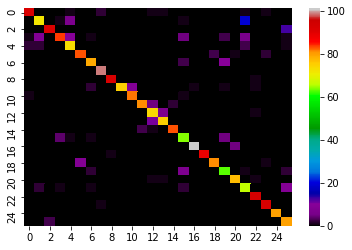

In [116]:
best_knn = KNeighborsClassifier(n_neighbors = 7 , metric = 'euclidean', weights = "distance", n_jobs = -1)
_ = Baseline_approach(best_knn, X_train,X_test,y_train,y_test)

#### Multi-Layer Perceptron (MLP)



Hyperparameters: hidden_layer_sizes, activation, solver, max_iter, learning_rate, alpha.

Βέλτιστοι παράμετροι προέκυψαν οι εξής:
*   activation = relu 
*   alpha = 0.001
*   hidden_layer_sizes = 256
*   learning_rate = constant
*   max_iter = 200
*   solver = adam

Accuracy = 0.9649033431544065


Για την βελτιστοποιηση του MLP αρχικώς δοκιμάσαμε ένα ευρύ gridsearch και στην συνέχεια αφού επιλέξαμε ορισμένες μεταβλητές ως αρχικοποίηση τρέξαμε από ένα gridsearch για κάθε επιμέρους παράμετρο. Αυτο το κάναμε διότι έτρεχε εξαντλητικά αργά η εκπαίδευση του νευρωνικού

In [ ]:
parameters =  {'hidden_layer_sizes':[8,16], "activation": ('logistic', 'tanh', 'relu'), "solver": ("lbfgs", "sgd", "adam"), "max_iter": [100, 200], "learning_rate": ('constant', 'invscaling'), "alpha": [.001,.0001]}
clf = MLPClassifier()

grid_search(clf,parameters,X_train,X_test,y_train,y_test,5)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 43.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=16, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.9522592338418284


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=16, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
parameters =  {'hidden_layer_sizes':[8,16,32,64,128,256,512]}
clf = MLPClassifier(activation='relu',solver='adam',max_iter=200,learning_rate='invscaling',alpha=.0001)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,5)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  7.0min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=256, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.964423870595793


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=256, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
parameters =  {'learning_rate':('constant','invscaling')}
clf = MLPClassifier(hidden_layer_sizes = 256, activation='relu',solver='adam',max_iter=200,alpha=.0001)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,5,)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.9min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=256, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.967619018937397


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=256, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
parameters =  {'max_iter':[100,200,400]}
clf = MLPClassifier(hidden_layer_sizes = 256, activation='relu',learning_rate='invscaling',solver='adam',alpha=.0001)

grid_search(clf,parameters,X_train,X_test,y_train,y_test,5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.0min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=256, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.9649866692135518


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=256, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [117]:
parameters =  {"alpha": [0,.001,.0001] }
clf = MLPClassifier(hidden_layer_sizes = 256, activation='relu',learning_rate='constant',solver='adam',max_iter = 200)
grid_search(clf,parameters,X_train,X_test,y_train,y_test,5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.4min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=256, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.9670334060893222


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=256, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=256, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 0.9662393162393162
f1 micro score = 0.9662393162393162
f1 macro score = 0.9661723438508318


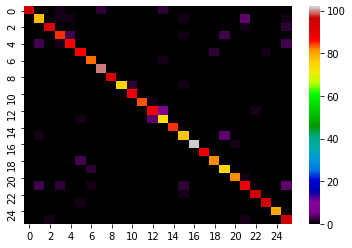

In [118]:
best_MLP = MLPClassifier(alpha = 0.0001, hidden_layer_sizes = 256, activation='relu', learning_rate='constant', solver='adam', max_iter = 200)
_ = Baseline_approach(best_MLP, X_train,X_test,y_train,y_test)

#### Support Vector Machines (SVM)



##### Linear Kernel:

Hyperparameters: loss, tol, C.

Βέλτιστοι παράμετροι προέκυψαν οι εξής:

*   loss = squared_hinge
*   tol = 0.0001
*   C = 0.1

Accuracy = 0.958544359919671


In [ ]:
clf = LinearSVC(dual = False)
parameters = {'loss': ('hinge', 'squared_hinge'), 'tol': [0,.001,.0001], 'C': [.1,1,10]}
grid_search(clf,parameters,X_train,X_test,y_train,y_test,5)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.9min finished


LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
0.958544359919671


LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) 0.958974358974359
f1 micro score = 0.958974358974359
f1 macro score = 0.958544359919671


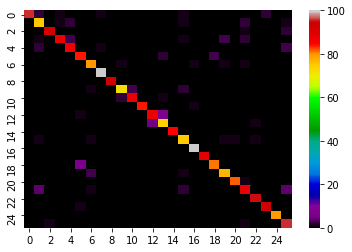

In [120]:
best_Linearsvm = LinearSVC(loss = 'squared_hinge',tol = 0.0001,C = .1 ,dual = False)
_ = Baseline_approach(best_Linearsvm, X_train,X_test,y_train,y_test)

##### Poly & Rbf Kernels: 

Hyperparameters: kernel, C, degree, gamma, tol

Βέλτιστοι παράμετροι προέκυψαν οι εξής:

*   kernel = rbf
*   C = 10
*   tol = 0.001
*   degree = 2
*   gamma = scale

Accuracy = 0.972449275377252

In [ ]:
clf = SVC()
parameters = {'kernel': ('poly’', 'rbf'), 'degree': [2,3,4],"gamma": ('scale', 'auto'), 'tol': [.001,.0001], 'C': [.1,1,10]}
grid_search(clf,parameters,X_train,X_test,y_train,y_test,5)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 24.2min finished


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.972449275377252


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 0.9722222222222222
f1 micro score = 0.9722222222222222
f1 macro score = 0.972449275377252


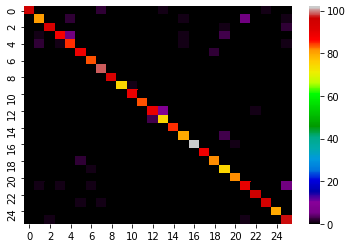

In [121]:
best_svm = SVC(kernel = 'rbf',tol = 0.001, C = 10, degree = 2, gamma = 'scale' )
_ = Baseline_approach(best_svm, X_train,X_test,y_train,y_test)

### 2. Final fit and running time

Αναμένουμε μεγάλο χρόνο εκπαίδευσης στο νευρωνικό και τις δύο μεθόδους SVM, ενώ μεγάλο χρόνο εκτέλεσης στην μέθοδο Knn. Οι χρόνοι εκτέλεσης εκπαίδευσης και πρόβλεψης των βέλιστων classifiers προκύπτουν:

In [119]:
t = Texttable()

fit_times = []
predict_times = []
table = [['Classifier','Fit time (s)','Predict time (s)', 'Score']]
classifiernames = ["GNB","Knn","MLP","SVM","LinearSVM"]
GNB = GaussianNB()
best_knn = KNeighborsClassifier(n_neighbors = 7 , metric = 'euclidean', weights = "distance", n_jobs = -1)
best_mlp = MLPClassifier(alpha = 0.0001, hidden_layer_sizes = 256, activation='relu', learning_rate='constant', solver='adam', max_iter = 200)
best_Linearsvm =  LinearSVC(loss = 'squared_hinge', tol = 0.0001, C = .1, dual = False)
best_Svm = SVC(kernel = 'rbf', C = 10, tol = .001, degree = 2, gamma = 'scale')
bestclassifierlist = [GNB,best_knn,best_mlp,best_Svm,best_Linearsvm]

i = 0
for clf in bestclassifierlist:
    point1 = time.time()
    clf.fit(X_train,y_train)
    point2 = time.time()
    y_pred = clf.predict(X_test)
    point3 = time.time()
    fit_times.append(round(point2 - point1,3))
    predict_times.append(round(point3-point2,3))
    table.append([classifiernames[i],round(point2 - point1,3),round(point3-point2,3),clf.score(X_test,y_test)])

    i += 1

t.add_rows(table)
print(t.draw())

+------------+--------------+------------------+-------+
| Classifier | Fit time (s) | Predict time (s) | Score |
+============+==============+==================+=======+
| GNB        | 0.050        | 0.195            | 0.792 |
+------------+--------------+------------------+-------+
| Knn        | 0.405        | 12.236           | 0.906 |
+------------+--------------+------------------+-------+
| MLP        | 26.284       | 0.037            | 0.965 |
+------------+--------------+------------------+-------+
| SVM        | 8.521        | 8.254            | 0.972 |
+------------+--------------+------------------+-------+
| LinearSVM  | 8.164        | 0.007            | 0.959 |
+------------+--------------+------------------+-------+


### 3. Averaged metric bar plots

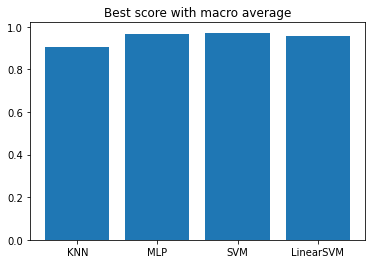

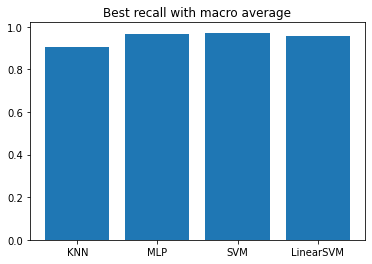

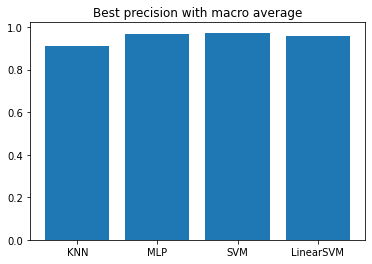

In [122]:
best_averaged_plots(bestclassifierlist[1:],X_test,y_test,"Best")

### 4. Before And After Optimization

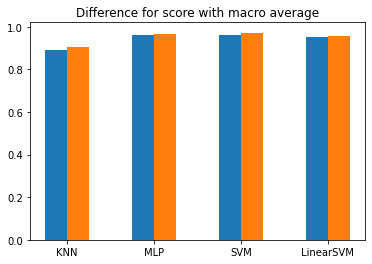

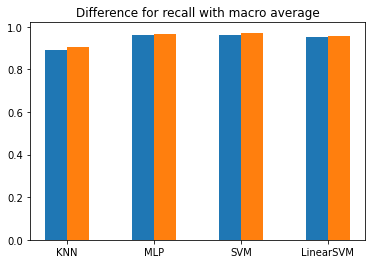

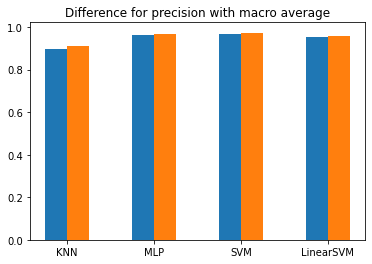

In [123]:
difference_averaged_plots(classifierlist[3:],bestclassifierlist[1:],X_test,y_test,"Difference")

### 5. Precision, Recall, F1 Scores, and more 



Όπως σχολιάσαμε και προηγουμένως το classification πρόβλημα που αντιμετωπίζουμε είναι αρκετά εύκολο. Με fine tuning καταφέρνουμε να ανεβάσουμε τις επιδόσεις των ταξινομητών σε ποσοστό της τάξης του 0.5%. Παρατηρούμε και πάλι πώς έχουμε περίπου ίδιες τιμές precision και recall. Οι επιδόσεις των βέλτιστων ταξινομητών ξεκινούν από το 80% και φτάνουν έως και 97% 